In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
# Load the dataset
df = pd.read_parquet('dataset/LoanData_after_DataCleaning.parquet')

In [6]:
# Print the shape of the data
df.shape

(21015, 29)

In [7]:
#Print the first 5 rows of the dataset
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,...,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,Individual
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,...,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,Individual
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,...,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,Individual
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,...,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,Individual
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,...,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,Individual


In [9]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,2.101500e+04,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000,21015.000000
mean,15247.552938,15247.552938,15241.224126,12.254598,441.629202,8.003775e+04,19.317213,0.338330,694.943850,698.943945,0.608232,12.226315,0.232072,17674.564454,51.906013,25.616227
std,8758.640338,8758.640338,8753.737831,4.210099,250.163947,6.237186e+04,8.766120,0.886337,31.055581,31.056042,0.889796,5.792745,0.639771,23093.748226,24.112053,12.192821
min,1000.000000,1000.000000,1000.000000,5.320000,30.540000,3.800000e+03,0.000000,0.000000,660.000000,664.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,8000.000000,8000.000000,8000.000000,9.170000,258.700000,5.000000e+04,12.690000,0.000000,670.000000,674.000000,0.000000,8.000000,0.000000,6379.500000,33.900000,17.000000
50%,14000.000000,14000.000000,14000.000000,11.990000,384.920000,6.946000e+04,18.790000,0.000000,690.000000,694.000000,0.000000,11.000000,0.000000,12074.000000,51.800000,24.000000
75%,20400.000000,20400.000000,20400.000000,14.480000,589.785000,9.600000e+04,25.560000,0.000000,710.000000,714.000000,1.000000,15.000000,0.000000,21499.000000,70.300000,32.000000
max,35000.000000,35000.000000,35000.000000,28.990000,1354.660000,3.964280e+06,136.970000,15.000000,845.000000,850.000000,5.000000,65.000000,23.000000,647310.000000,134.300000,111.000000


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21015 entries, 0 to 22509
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            21015 non-null  float64
 1   funded_amnt          21015 non-null  float64
 2   funded_amnt_inv      21015 non-null  float64
 3   term                 21015 non-null  object 
 4   int_rate             21015 non-null  float64
 5   installment          21015 non-null  float64
 6   grade                21015 non-null  object 
 7   sub_grade            21015 non-null  object 
 8   emp_title            21015 non-null  object 
 9   emp_length           21015 non-null  object 
 10  home_ownership       21015 non-null  object 
 11  annual_inc           21015 non-null  float64
 12  verification_status  21015 non-null  object 
 13  loan_status          21015 non-null  object 
 14  purpose              21015 non-null  object 
 15  addr_state           21015 non-null  obje

In [11]:
print(df['loan_status'].unique())

['Fully Paid' 'Current' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)']


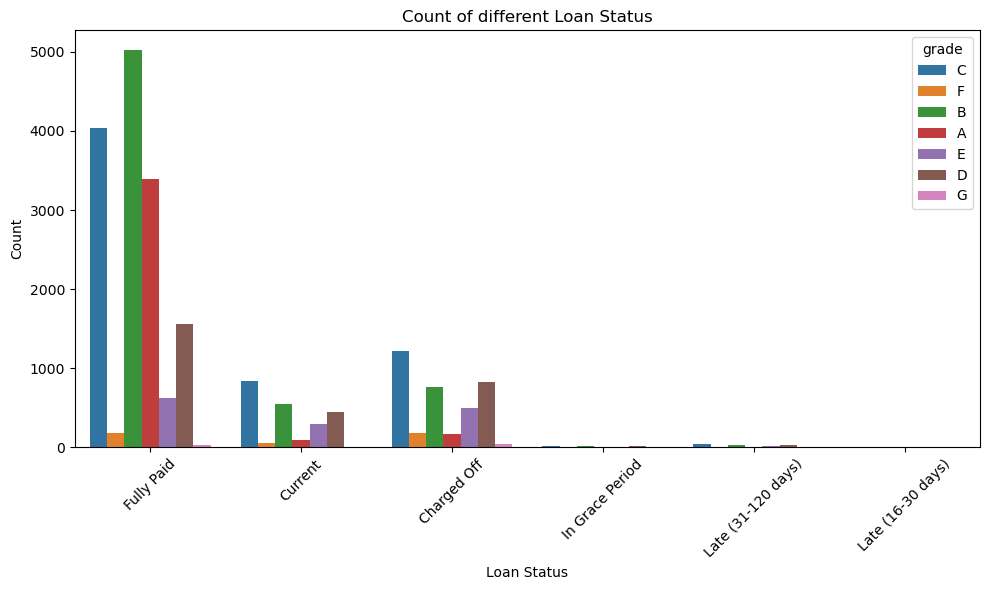

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df, hue="grade")
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()



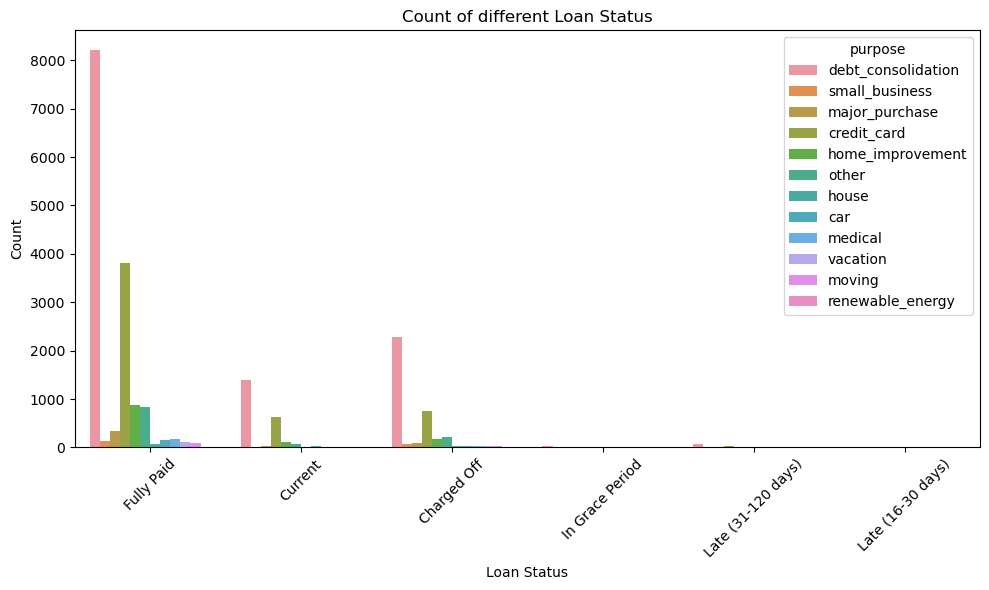

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=df, hue="purpose")
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

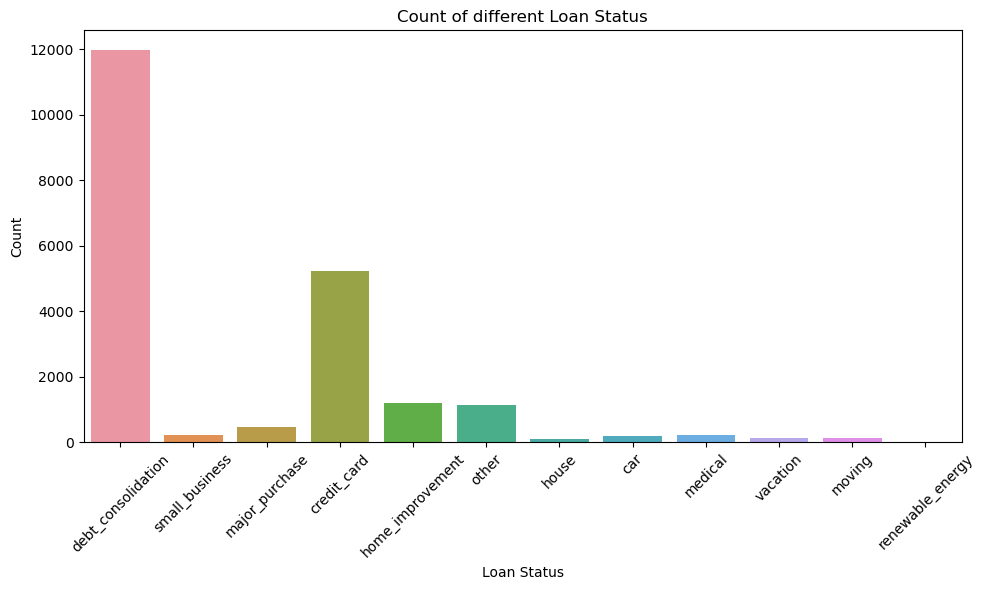

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', data=df)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

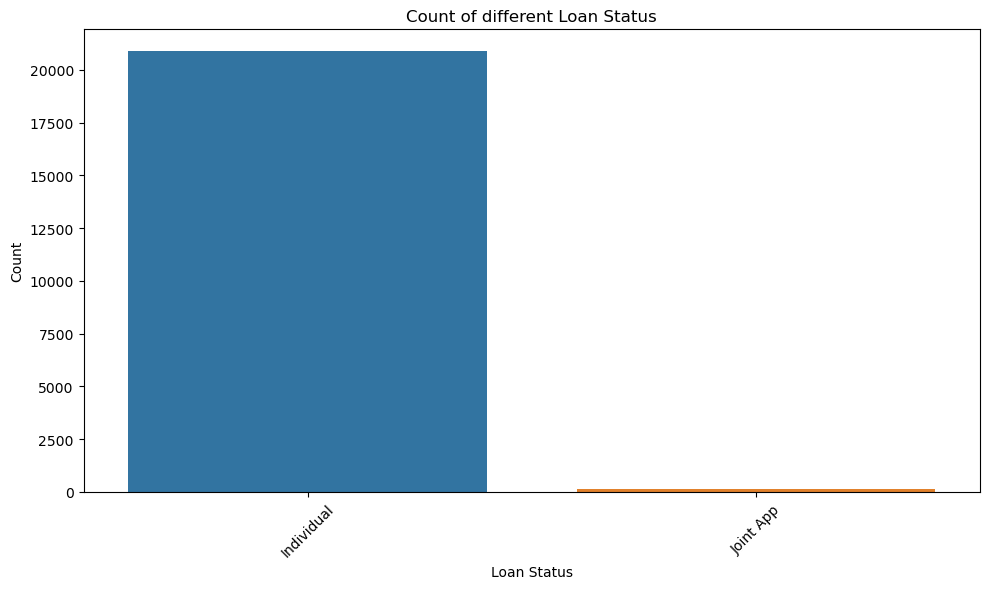

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='application_type', data=df)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

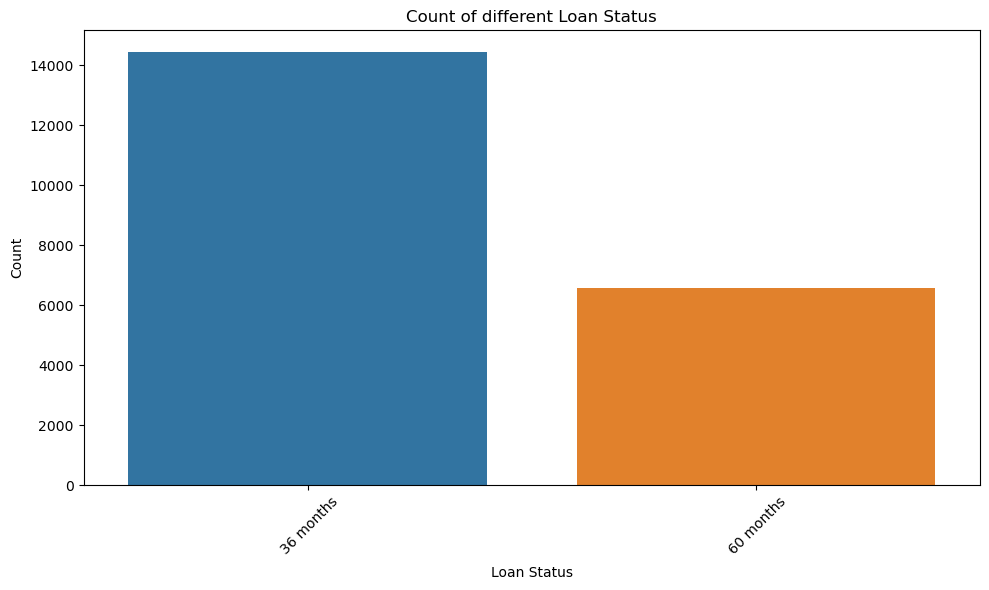

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='term', data=df)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

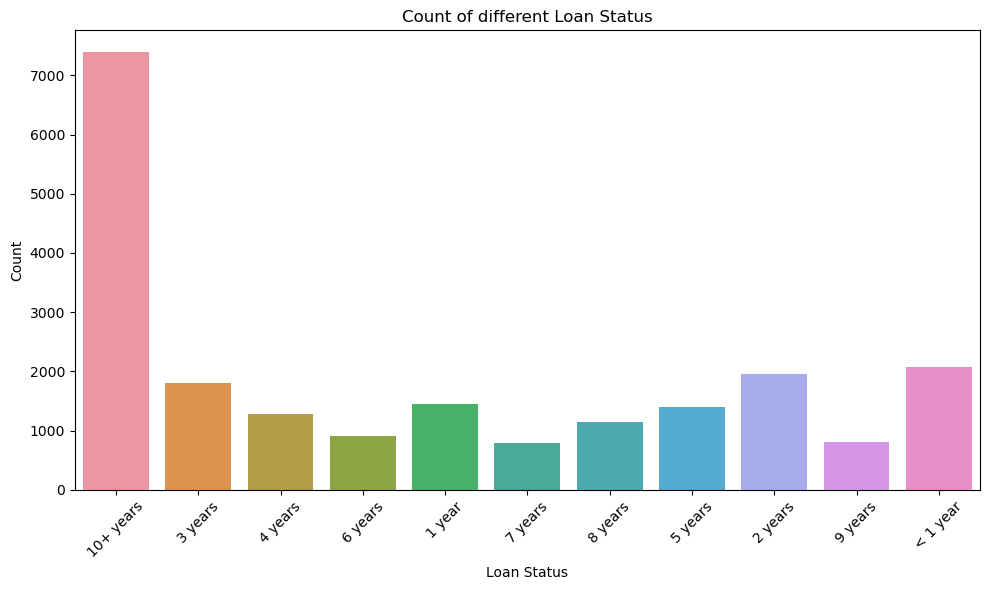

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emp_length', data=df)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

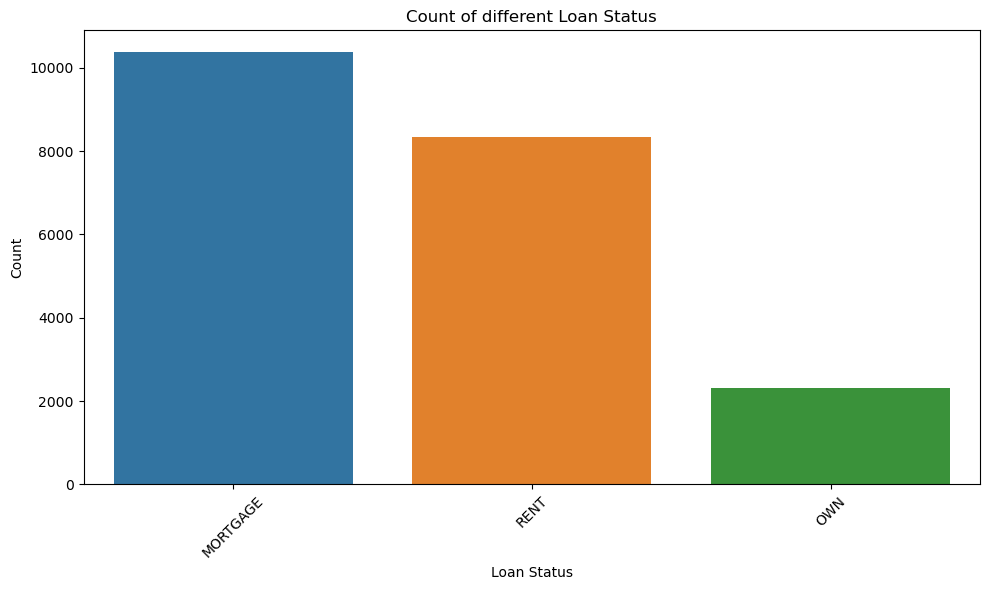

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', data=df)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

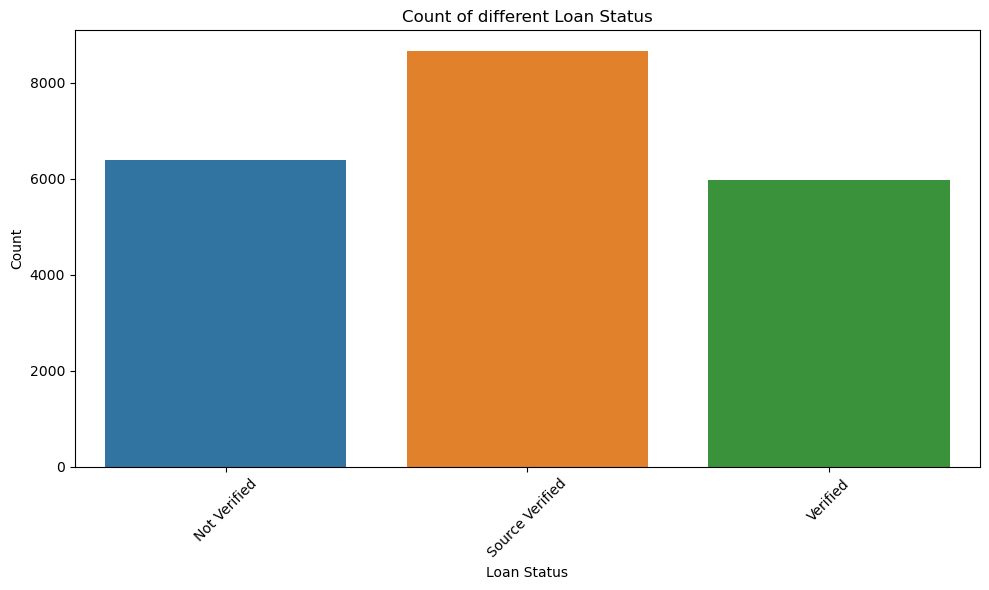

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', data=df)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

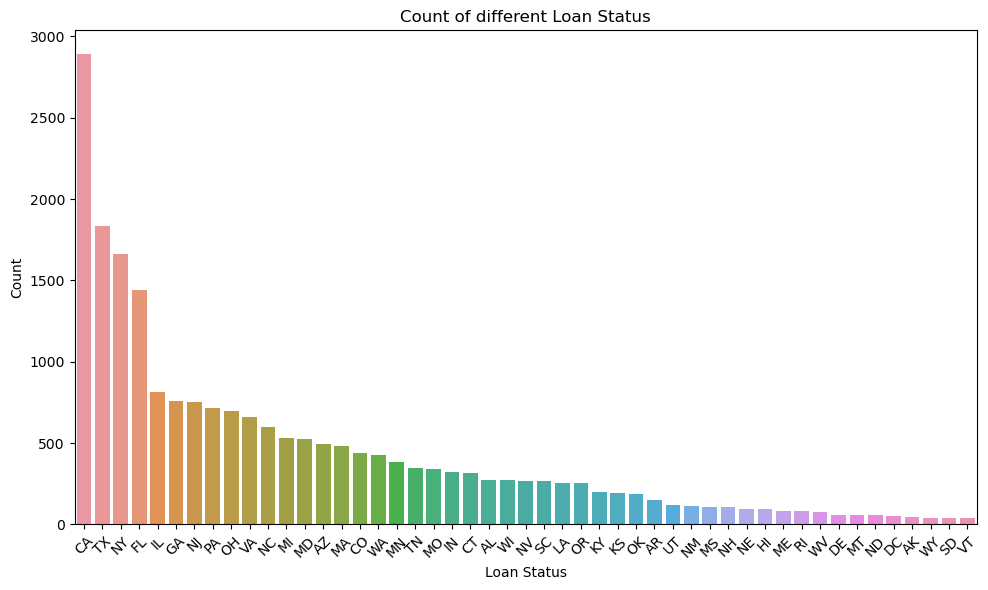

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='addr_state', data=df,order=df['addr_state'].value_counts().index)
plt.ylabel("Count")
plt.xlabel("Loan Status")
plt.title("Count of different Loan Status")
plt.xticks(rotation=45)
plt.tight_layout()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21015 entries, 0 to 22509
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            21015 non-null  float64
 1   funded_amnt          21015 non-null  float64
 2   funded_amnt_inv      21015 non-null  float64
 3   term                 21015 non-null  object 
 4   int_rate             21015 non-null  float64
 5   installment          21015 non-null  float64
 6   grade                21015 non-null  object 
 7   sub_grade            21015 non-null  object 
 8   emp_title            21015 non-null  object 
 9   emp_length           21015 non-null  object 
 10  home_ownership       21015 non-null  object 
 11  annual_inc           21015 non-null  float64
 12  verification_status  21015 non-null  object 
 13  loan_status          21015 non-null  object 
 14  purpose              21015 non-null  object 
 15  addr_state           21015 non-null  obje